In [0]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels


     |████████████████████████████████| 2.1MB 2.8MB/s 
  Found existing installation: Cython 0.29.9
    Uninstalling Cython-0.29.9:
      Successfully uninstalled Cython-0.29.9
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-bvhpwtvd
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-bvhpwtvd
  Stored in directory: /tmp/pip-ephem-wheel-cache-8ypsenbv/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 2.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime
import statsmodels.api as sm

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')


In [0]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [0]:
import pandas as pd
import json


In [3]:
Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]

status_count=[]
hashtag_count=[]
friends_count=[]
mentions_TF=[]
favourites_count=[]
url_ratio_count=[]


with open('./ECE219_tweet_data/tweets_#nfl.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count.append(json_object['metrics']['citations']['total'])
    tweet_time.append(datetime_object)
    
    ### new features:
    status_count.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF.append(0)
    else:
      mentions_TF.append(1)

    url_ratio_count.append(len(json_object['tweet']['entities']['urls']))
    favourites_count.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

True

In [4]:
import pytz
import numpy as np
from datetime import timedelta


pst_tz = pytz.timezone('America/Los_Angeles')
sortTime= np.sort(tweet_time, axis=0)


mint=datetime.datetime.fromtimestamp(sortTime[0], pst_tz)
maxt=datetime.datetime.fromtimestamp(sortTime[-1], pst_tz)
timerange=maxt-mint
print("True range in hour: ",timerange.total_seconds()/(60*60))
total_time_range= timerange.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)


# avg num of followers per tweet
avg_followers_tweet_gohawks = np.mean(follow_count)
print("Average number of followers posting per tweet: ", np.mean(follow_count))

# avg num of retweets per tweet
avg_retweets_tweet_gohawks = np.mean(retweet_count)
print("Average number of retweets per tweet: ", np.mean(retweet_count))







min_tweet_time= np.min(tweet_time)



minute_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).minute
second_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).second

timeD=timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)

min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD
# print(min_time_conv)

tweet_window=[]
for element in tweet_time:
  element_conv= datetime.datetime.fromtimestamp(element, pst_tz)
  
  bin_index=(element_conv-min_time_conv).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  tweet_window.append(int(bin_index))
  
  
# print(np.max(tweet_window))
# print((tweet_window))
# np.where(np.asarray(tweet_window,dtype=int)==0)
retweet_array_window=[]
for i in range(np.max(tweet_window)+1):
#   print(np.where(np.asarray(tweet_window,dtype=int)==i))
  retweet_array_window.append(np.where(np.asarray(tweet_window,dtype=int)==i))
#   break

True range in hour:  586.9255555555555
Average number of tweets per hour 397.0213901819841
Average number of followers posting per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254


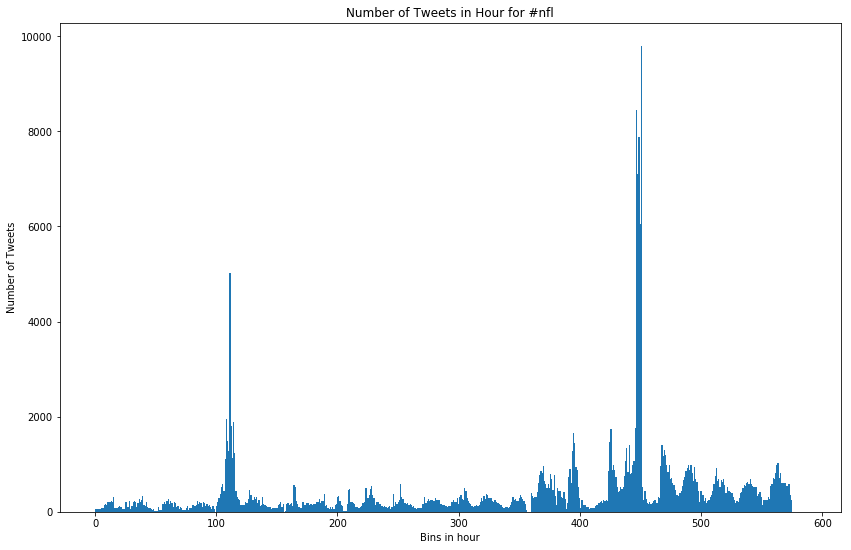

In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14,9))
plt.hist(tweet_window, bins=int(np.max(tweet_window))+1)
plt.title('Number of Tweets in Hour for #nfl')
plt.xlabel('Bins in hour')
plt.ylabel('Number of Tweets')

plt.show()

In [6]:
# print(retweet_array_window[0][0][0])
# print(retweet_array_window)
my_retweet_count=[]
my_follow_count=[]
my_max_follower_count=[]
my_time_of_day=[]

my_status_count=[] #get how many status in certain hour
my_hashtag_count=[] #get how many hashtags in certain hour
my_friends_count=[] #max friend count
my_mentions_TF=[] #
my_favourites_count=[]

for element in retweet_array_window:
  for innerelement in element:
#     print(innerelement)[]
    item=0
    item1=0
    maxitem2=0
    timeitem=0
    
    item_status=0
    item_hashtag=0
    item_friends=0
    item_mentions=0
    item_favourites=0
    for indexlayer in innerelement:
      item=retweet_count[indexlayer]+item
      item1=follow_count[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time[indexlayer], pst_tz).hour
      
      item_status= status_count[indexlayer]+ item_status
      item_hashtag=hashtag_count[indexlayer]+ item_hashtag
      item_friends=item_friends+ friends_count[indexlayer]
      item_mentions=item_mentions+ mentions_TF[indexlayer]
      item_favourites=item_favourites+ favourites_count[indexlayer]
      
      
      
      
      if maxitem2 < follow_count[indexlayer]:
        maxitem2= follow_count[indexlayer]
    my_time_of_day.append(timeitem)   
    my_max_follower_count.append(maxitem2)  
    my_retweet_count.append(item)
    my_follow_count.append(item1)
    
    my_status_count.append(item_status)
    my_hashtag_count.append(item_hashtag)
    my_friends_count.append(item_friends)
    my_mentions_TF.append(item_mentions)
    my_favourites_count.append(item_favourites)

n_tweet= np.histogram(tweet_window,bins=int(np.max(tweet_window))+1)
print(len(n_tweet[0]))            
print(len(my_retweet_count))
print(len(my_follow_count))
print(len(my_max_follower_count))
print(len(my_time_of_day))

df = pd.DataFrame({
    '# of Tweets' : n_tweet[0],
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Mentions': my_mentions_TF,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
    'Friends': my_friends_count,
    'Favourites': my_favourites_count,
    'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
                  'Mentions',
                  'Status', 
                  'Hashtags', 
                  'Friends', 
                  'Favourites',
                  'Time of day'])
# x=[n_tweet[0], my_retweet_count, my_follow_count, my_max_follower_count, my_status_count,my_hashtag_count]

587
587
587
587
587
